#### Sacarlo +-5° en lat. galáctica a los random 
##### Y eventualmente a los Auger

In [51]:
"""
Read data and create Random Catalog
"""
def generate_RandomCatalogue(ra,dec,nmult,seed):
    
    np.random.seed(seed)

    ra_min = np.min(ra)
    ra_max = np.max(ra)
    dec_min = np.min(dec)
    dec_max = np.max(dec)

    rand_ra = np.random.uniform(ra_min, ra_max, len(ra)*nmult)
    rand_sindec = np.random.uniform(np.sin(dec_min*np.pi/180.), np.sin(dec_max*np.pi/180.), \
                                    len(ra)*nmult)
    rand_dec = np.arcsin(rand_sindec)*180./np.pi

    return rand_ra, rand_dec

import numpy as np
from astropy.io import ascii

minsep = 10.
maxsep = 90.
nbins = 15
nmult = 50
npatch = 50

seed1 = 12936
seed2 = 19284

filename_g = '../data/VLS/2MRSxWISE_VLS.txt'
data = ascii.read(filename_g)

filename_e = '../data/Auger/events_a8_lb.dat'
events_a8 = ascii.read(filename_e)

rand_ra1, rand_dec1 = generate_RandomCatalogue(data['_RAJ2000'],data['_DEJ2000'],\
                                               nmult,seed1)



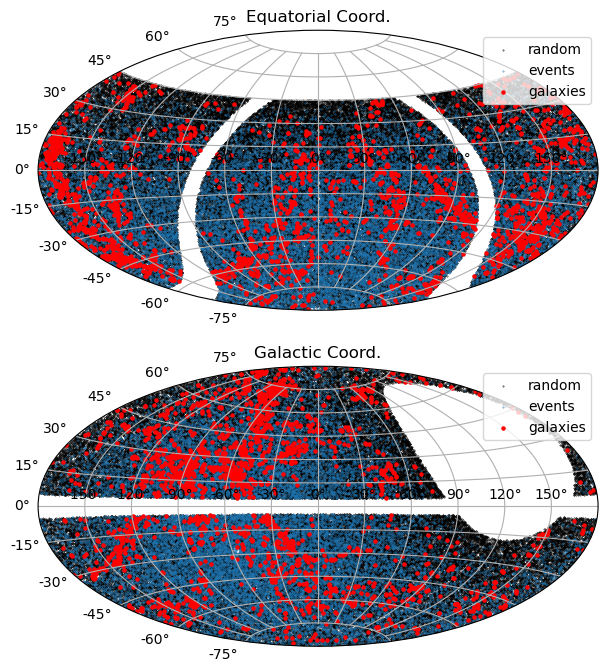

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u

gxs = SkyCoord(data['_RAJ2000'],data['_DEJ2000'],frame='icrs',unit='degree')
eve = SkyCoord(events_a8['RA'],events_a8['dec'],frame='icrs',unit='degree')
ran = SkyCoord(rand_ra1,rand_dec1,frame='icrs',unit='degree')

mask_ran = np.where([abs(ran.galactic.b)>5.*(u.degree)])[1]
mask_eve = np.where([abs(eve.galactic.b)>5.*(u.degree)])[1]

eve = eve[mask_eve]
ran = ran[mask_ran]
ran.ra.wrap_angle=180.*u.degree

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(211, projection="aitoff")
ax.scatter(ran.ra.wrap_at(180*u.degree).to(u.rad),ran.dec.to(u.rad),s=.1,c='k',label='random')
ax.scatter(eve.ra.wrap_at(180*u.degree).to(u.rad),eve.dec.to(u.rad),s=.1,label='events')
ax.scatter(gxs.ra.wrap_at(180*u.degree).to(u.rad),gxs.dec.to(u.rad),s=5,c='r',label='galaxies')
ax.legend(loc=1)
ax.set_title('Equatorial Coord.')
ax.grid(True)

ax1 = fig.add_subplot(212, projection="aitoff")
ax1.scatter(ran.galactic.l.wrap_at(180*u.degree).to(u.rad),ran.galactic.b.to(u.rad),s=.1,c='k',label='random')
ax1.scatter(eve.galactic.l.wrap_at(180*u.degree).to(u.rad),eve.galactic.b.to(u.rad),s=.1,label='events')
ax1.scatter(gxs.galactic.l.wrap_at(180*u.degree).to(u.rad),gxs.galactic.b.to(u.rad),s=5,c='r',label='galaxies')
ax1.legend(loc=1)
ax1.set_title('Galactic Coord.')
ax1.grid(True)

plt.show()